<a href="https://colab.research.google.com/github/Jahnavigutlapalli/House-Prediction/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opendatasets

In [3]:
import os
import opendatasets as od

{"username":"gutlapallijahnavi","key":"f4a42d53c47b27ddabedc7b1f5f74a5c"}

In [7]:
od.download("https://www.kaggle.com/competitions/playground-series-s3e6/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gutlapallijahnavi
Your Kaggle Key: ··········


100%|██████████| 1.00M/1.00M [00:00<00:00, 93.7MB/s]


Extracting archive ./playground-series-s3e6/playground-series-s3e6.zip to ./playground-series-s3e6


In [8]:
os.listdir("playground-series-s3e6")

['sample_submission.csv', 'train.csv', 'test.csv']

In [9]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

import warnings
warnings.filterwarnings("ignore")

In [10]:
train_df = pd.read_csv("playground-series-s3e6/train.csv")
test_df = pd.read_csv("playground-series-s3e6/test.csv")
submission_df = pd.read_csv("playground-series-s3e6/sample_submission.csv")

In [11]:
train_df

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [13]:
train_df.nunique()

id                   22730
squareMeters          7319
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 101
cityCode              7810
cityPartRange           10
numPrevOwners           10
made                    33
isNewBuilt               2
hasStormProtector        2
basement              4903
attic                 5167
garage                 896
hasStorageRoom           2
hasGuestRoom            11
price                 7421
dtype: int64

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22730.0,1.136450e+04,6.561730e+03,0.0,5682.25,11364.5,17046.75,22729.0
squareMeters,22730.0,4.658622e+04,4.952124e+04,89.0,20392.75,44484.0,71547.00,6071330.0
numberOfRooms,22730.0,4.824109e+01,2.822643e+01,1.0,25.00,47.0,75.00,100.0
hasYard,22730.0,4.758909e-01,4.994294e-01,0.0,0.00,0.0,1.00,1.0
hasPool,22730.0,4.527497e-01,4.977733e-01,0.0,0.00,0.0,1.00,1.0
floors,22730.0,4.730598e+01,4.777721e+01,1.0,25.00,45.0,69.00,6000.0
cityCode,22730.0,5.001380e+04,3.000664e+04,3.0,22936.00,50414.0,76291.00,491100.0
cityPartRange,22730.0,5.585042e+00,2.739533e+00,1.0,3.00,6.0,8.00,10.0
numPrevOwners,22730.0,5.620766e+00,2.713026e+00,1.0,3.00,6.0,8.00,10.0
made,22730.0,2.008005e+03,1.188268e+02,1990.0,2000.00,2006.0,2014.00,10000.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
train_df['price'].describe().T

count      22730.00
mean     4634456.90
std      2925163.24
min        10313.50
25%      2041739.10
50%      4450823.40
75%      7159919.50
max     10004278.30
Name: price, dtype: float64

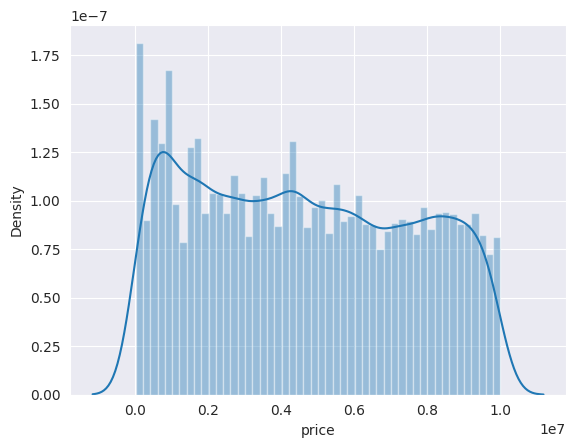

In [17]:
sns.distplot(train_df['price'], bins=50);

In [18]:
train_df['squareMeters'].unique().max()

6071330

In [19]:
data = train_df[train_df['squareMeters']  < 100000]

In [20]:
px.scatter(data, x='squareMeters', y='price', color='hasPool')

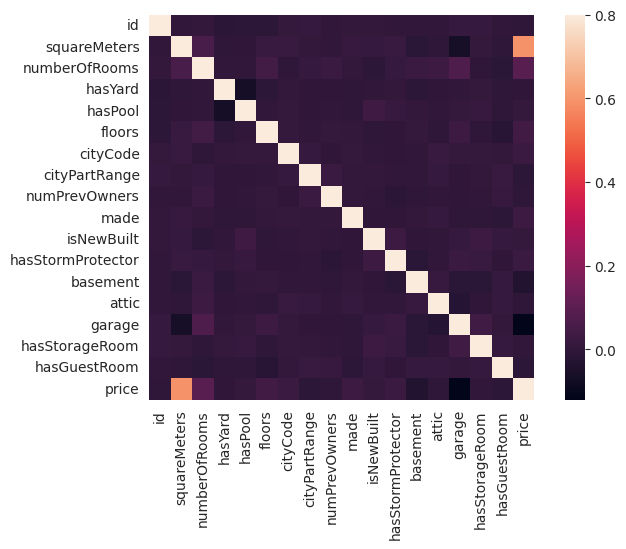

In [21]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

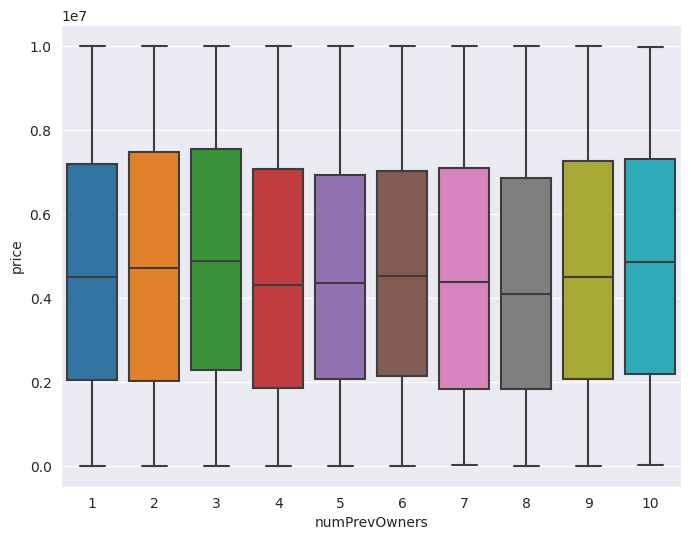

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='numPrevOwners', y="price", data=train_df)

In [23]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22730.00,11364.50,6561.73,0.00,5682.25,11364.50,17046.75,22729.00
squareMeters,22730.00,46586.22,49521.24,89.00,20392.75,44484.00,71547.00,6071330.00
numberOfRooms,22730.00,48.24,28.23,1.00,25.00,47.00,75.00,100.00
hasYard,22730.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
hasPool,22730.00,0.45,0.50,0.00,0.00,0.00,1.00,1.00
floors,22730.00,47.31,47.78,1.00,25.00,45.00,69.00,6000.00
cityCode,22730.00,50013.80,30006.64,3.00,22936.00,50414.00,76291.00,491100.00
cityPartRange,22730.00,5.59,2.74,1.00,3.00,6.00,8.00,10.00
numPrevOwners,22730.00,5.62,2.71,1.00,3.00,6.00,8.00,10.00
made,22730.00,2008.01,118.83,1990.00,2000.00,2006.00,2014.00,10000.00


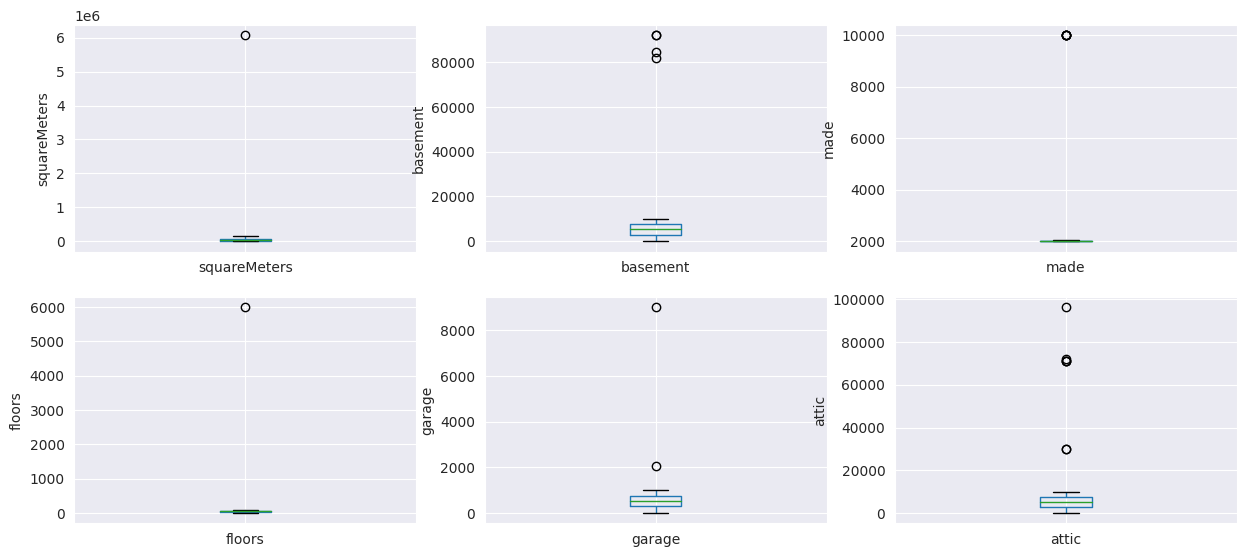

In [24]:
# Boxplots to visualize outliers
outlier_columns = ['squareMeters', 'basement', 'made', 'floors', 'garage', 'attic']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(15,10))

    for idx, column in enumerate(outlier_columns):
        plt.subplot(3, 3, idx+1)
        fig = train_df.boxplot(column=column)
        fig.set_ylabel(column)


plot_outliers(outlier_columns)

In [25]:
train_df['made'].unique()

array([ 2000,  2020,  2018,  1998,  2017,  2003,  1994,  1993,  2009,
        2014,  2011,  1996,  2015,  2004,  2019,  2008,  2005,  2007,
        2016,  1995,  2006,  1997,  2013,  2021,  1999,  2001,  1990,
        2010,  1991,  2012,  1992, 10000,  2002])

In [26]:
def fix_outlier(column):
    IQR = train_df[column].quantile(0.75) - train_df[column].quantile(0.25)
    Lower_fence = train_df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = train_df[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return train_df[train_df[column] <= Upper_fence]


for column in outlier_columns:
    train_df = fix_outlier(column)

squareMeters outliers are values < -133070.0 or > 225009.75
basement outliers are values < -11330.0 or > 22053.0
made outliers are values < 1958.0 or > 2056.0
floors outliers are values < -107.0 or > 201.0
garage outliers are values < -1113.0 or > 2177.0
attic outliers are values < -12560.0 or > 22811.0


In [27]:
# Confirm outliers have been fixed
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22711.00,11363.85,6561.47,0.00,5684.50,11362.00,17044.50,22729.00
squareMeters,22711.00,46312.79,29248.43,89.00,20392.00,44484.00,71541.00,146181.00
numberOfRooms,22711.00,48.23,28.23,1.00,25.00,47.00,75.00,100.00
hasYard,22711.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
hasPool,22711.00,0.45,0.50,0.00,0.00,0.00,1.00,1.00
floors,22711.00,47.04,26.90,1.00,25.00,45.00,69.00,100.00
cityCode,22711.00,50010.51,30008.73,3.00,22936.00,50409.00,76291.00,491100.00
cityPartRange,22711.00,5.58,2.74,1.00,3.00,6.00,8.00,10.00
numPrevOwners,22711.00,5.62,2.71,1.00,3.00,6.00,8.00,10.00
made,22711.00,2006.24,8.12,1990.00,2000.00,2006.00,2014.00,2021.00


In [28]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'price'

In [29]:
train_df.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [30]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [31]:
test_inputs = test_df[input_cols].copy()

In [32]:
train_inputs

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [33]:
test_inputs

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [34]:
numeric_cols = [
    'squareMeters','numberOfRooms','floors','cityPartRange','numPrevOwners',
    'made','basement','attic','garage','hasGuestRoom','cityCode'
]

categorical_cols = ['hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom']

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [38]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [39]:
train_inputs.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00,22711.00
mean,0.32,0.48,0.48,0.45,0.47,0.10,0.51,0.51,0.52,0.47,0.46,0.53,0.50,0.26,0.46,0.52
std,0.20,0.29,0.50,0.50,0.27,0.06,0.30,0.30,0.26,0.50,0.50,0.28,0.29,0.13,0.50,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.24,0.00,0.00,0.24,0.05,0.22,0.22,0.32,0.00,0.00,0.30,0.26,0.14,0.00,0.30
50%,0.30,0.46,0.00,0.00,0.44,0.10,0.56,0.56,0.52,0.00,0.00,0.54,0.50,0.25,0.00,0.50
75%,0.49,0.75,1.00,1.00,0.69,0.16,0.78,0.78,0.77,1.00,1.00,0.77,0.77,0.37,1.00,0.80
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]
y_train = train_df[target_col]
print(f"Shape of input training data: {X_train.shape}")
print(f"Shape of test training data: {y_train.shape}")
print(f"Shape of test data: {X_test.shape}")

Shape of input training data: (22711, 21)
Shape of test training data: (22711,)
Shape of test data: (15154, 21)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Shape of input training data: {X_train.shape}")
print(f"Shape of val data: {X_val.shape}")

Shape of input training data: (18168, 21)
Shape of val data: (4543, 21)


Model Building

In [42]:
from sklearn import metrics
from collections import Counter

In [43]:
def evaluate_model(model, X_train, y_train, X_val, y_val, y_pred):
    # Calculating Adjusted R-squared
    r2 = model.score(X_val, y_val)

    # Number of observations is the shape along axis 0
    n = X_val.shape[0]

    # Number of features (predictors, p) is the shape along axis 1
    p = X_val.shape[1]

    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    R2 = model.score(X_val, y_val)

    return R2, adjusted_r2, RMSE

In [44]:
def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_val, y_val, y_pred)]
    model_metrics = pd.DataFrame(data = df, columns=['R2 Score','Adjusted R2 Score','RMSE'])
    model_metrics.insert(0, 'Model', model_name)

    return model_metrics

Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
# Create and train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Generate predictions
y_pred = linear_reg.predict(X_val)
linear_reg_metrics = metric_df(linear_reg, 'Linear Regression')
linear_reg_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE
0,Linear Regression,1.00,1.00,171018.41


Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Create and train model
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train, y_train)

# Generate predictions
y_pred = rf_reg.predict(X_val)
rf_metrics = metric_df(rf_reg, 'Random Forest')
rf_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE
0,Random Forest,1.00,1.00,167836.08


Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
# Create and train model
ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)

# Generate Predictions
y_pred = ridge_reg.predict(X_val)
ridge_metrics = metric_df(ridge_reg, 'Ridge Regression')
ridge_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE
0,Ridge Regression,1.00,1.00,171772.27


LightGBM

In [48]:
from lightgbm import LGBMRegressor
# Create and train model
lgb_reg = LGBMRegressor(objective='regression', verbose=-1)
lgb_reg.fit(X_train, y_train)

# Generate Predictions
y_pred = lgb_reg.predict(X_val)
lgb_reg_metrics = metric_df(lgb_reg, 'LightGBM')
lgb_reg_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE
0,LightGBM,1.00,1.00,148983.68


XGBoost

In [49]:
from xgboost import XGBRegressor
# Create and train model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)

# Generate predictions
y_pred = XGBR.predict(X_val)
XGBR_metrics = metric_df(XGBR, 'XGBoost')
XGBR_metrics

,Model,R2 Score,Adjusted R2 Score,RMSE
0,XGBoost,1.00,1.00,160803.98


In [50]:
predictions = pd.concat([
    linear_reg_metrics, rf_metrics, ridge_metrics,
    lgb_reg_metrics, XGBR_metrics
], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,RMSE
0,Linear Regression,1.00,1.00,171018.41
1,Random Forest,1.00,1.00,167836.08
2,Ridge Regression,1.00,1.00,171772.27
3,LightGBM,1.00,1.00,148983.68
4,XGBoost,1.00,1.00,160803.98


from matplotlib import pyplot as plt
predictions['R2 Score'].plot(kind='hist', bins=20, title='R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Adjusted R2 Score'].plot(kind='hist', bins=20, title='Adjusted R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
predictions.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions.plot(kind='scatter', x='R2 Score', y='Adjusted R2 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions.plot(kind='scatter', x='Adjusted R2 Score', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['R2 Score'].plot(kind='line', figsize=(8, 4), title='R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions['Adjusted R2 Score'].plot(kind='line', figsize=(8, 4), title='Adjusted R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(predictions['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(predictions, x='R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(predictions['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(predictions, x='Adjusted R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(predictions['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(predictions, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [51]:
px.bar(predictions.sort_values(by='RMSE'), y='Model', x='RMSE')

Hyperparameter Tuning

In [52]:
XGBR_1 = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.9)
XGBR_1.fit(X_train, y_train)

# Generate predictions
y_pred = XGBR_1.predict(X_val)

XGBR_metrics_1 = metric_df(XGBR_1, 'XGBoost')
XGBR_metrics_1

,Model,R2 Score,Adjusted R2 Score,RMSE
0,XGBoost,1.00,1.00,145017.22


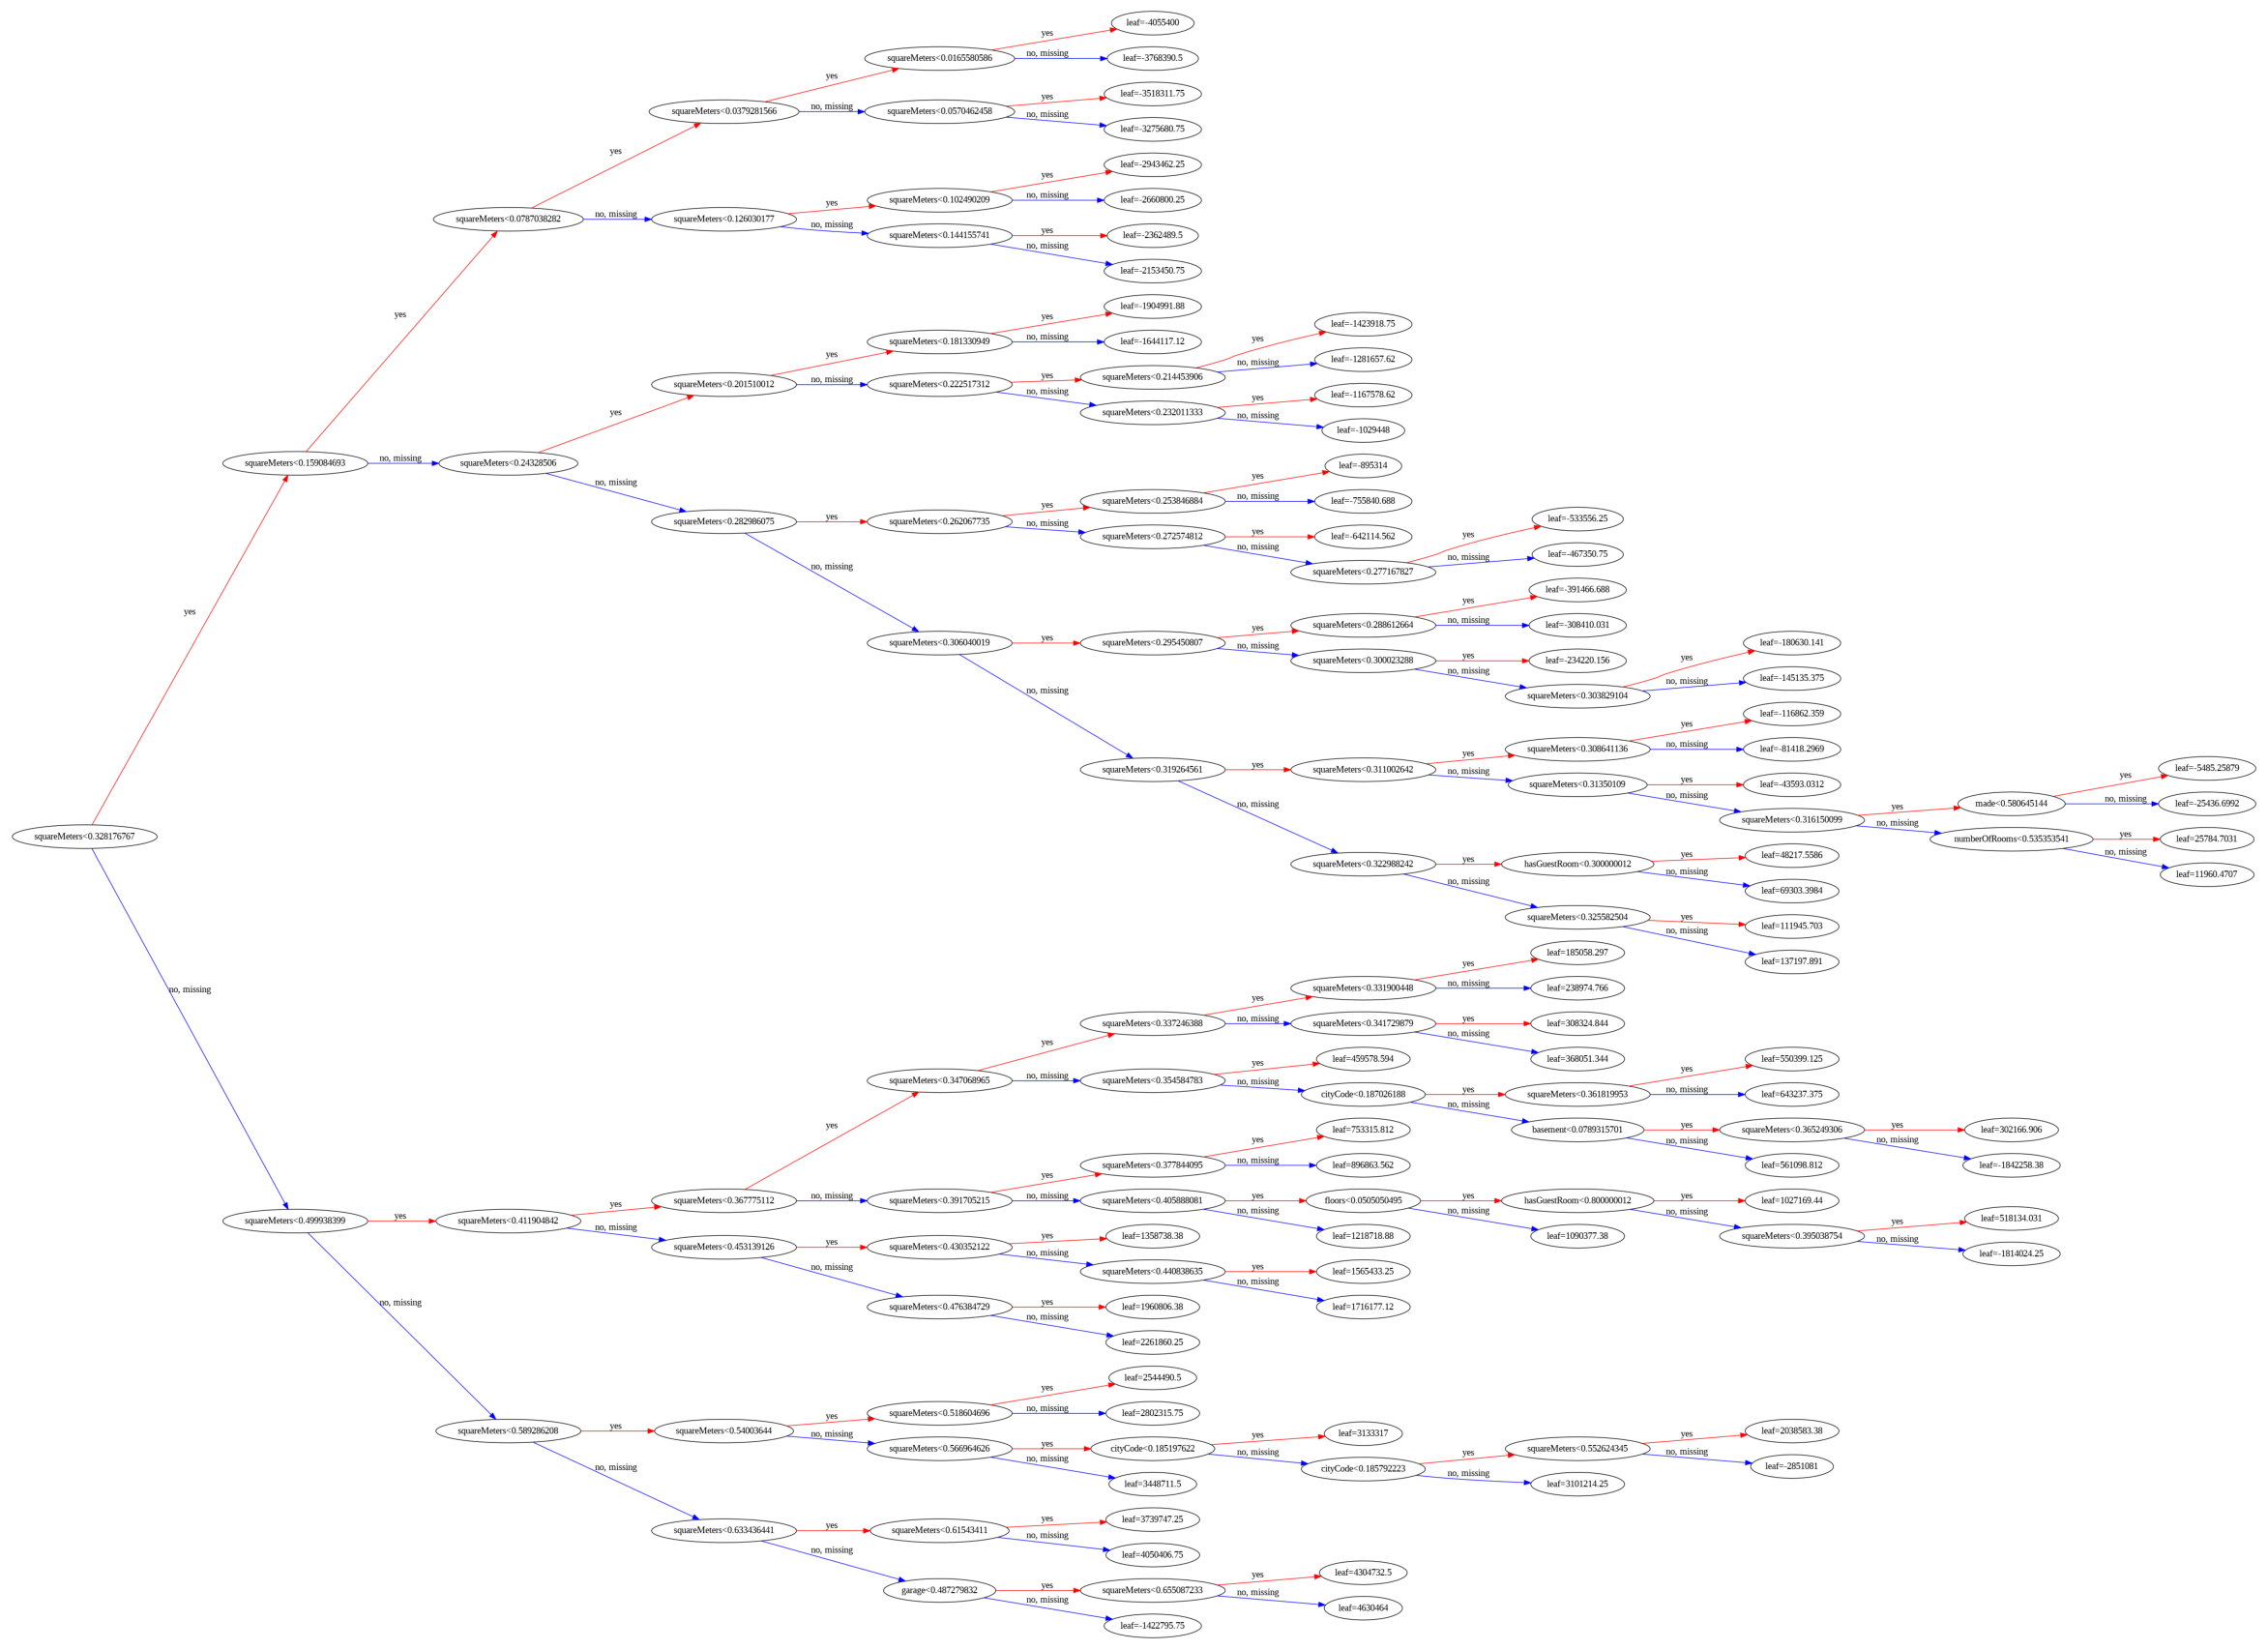

In [53]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 30,30
plot_tree(XGBR_1, rankdir='LR', num_trees=0);

In [54]:
importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'importance': XGBR.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head()

,feature,importance
0,squareMeters,0.91
5,made,0.02
1,numberOfRooms,0.01
16,isNewBuilt_1,0.01
9,hasGuestRoom,0.01


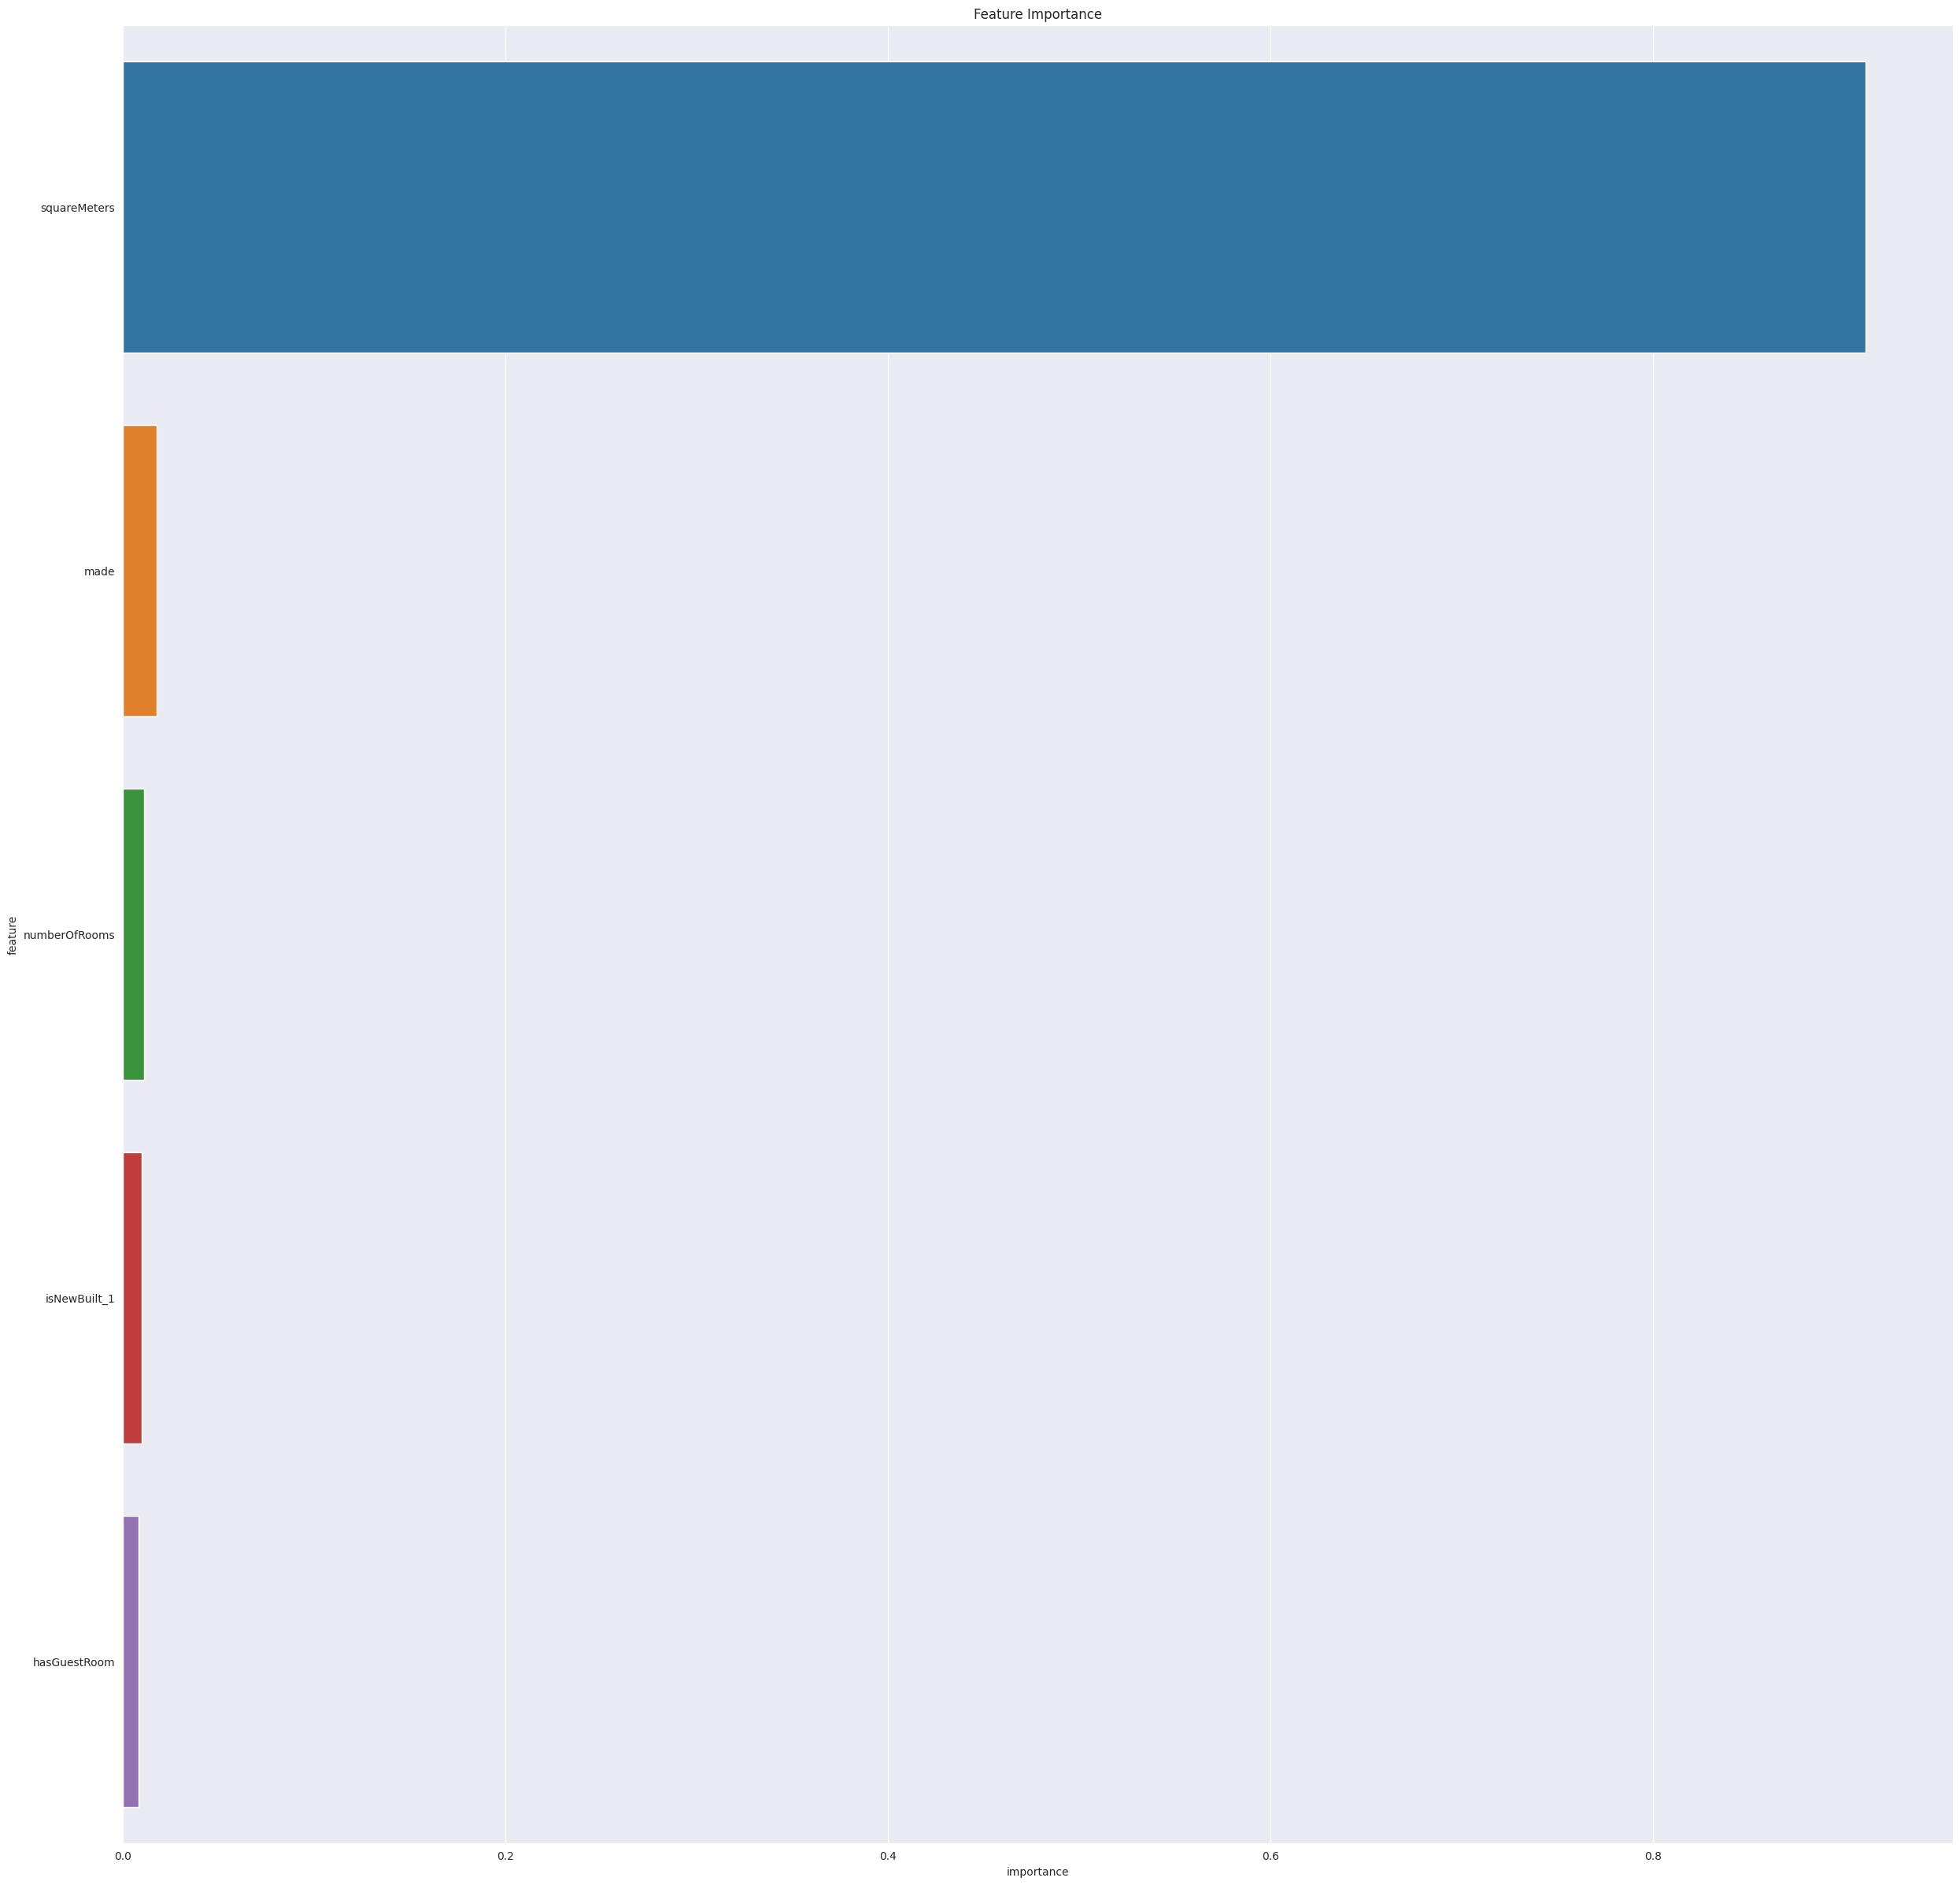

In [55]:
sns.barplot(data=importance_df.head(), x='importance', y='feature')
plt.title('Feature Importance');

In [57]:
test_preds = XGBR_1.predict(X_test)
test_preds
submission_df['price'] = test_preds
submission_df

,id,price
0,22730,4748685.00
1,22731,6190412.50
2,22732,9216067.00
3,22733,1644689.50
4,22734,6760529.00
...,...,...
15149,37879,8622640.00
15150,37880,4582023.00
15151,37881,7340560.50
15152,37882,7760617.50


In [58]:
submission_df.to_csv('submission.csv', index=None)

In [59]:
import joblib
joblib.dump(XGBR_1, 'tunned_xgboost_joblib')

['tunned_xgboost_joblib']